# This is Guillermo's test version of this code

In [2]:
import tensorflow as tf
import utils as utils
import h5py
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
import numpy as np

Using TensorFlow backend.


In [3]:
data_folder = '../data/'
file_name = 'HCAL_digi+rechit_occ.hdf5'
group = 'DigiTask_Occupancy_depth_depth1'

input_file=h5py.File(data_folder+"/"+file_name,'r')

To list all groups 

I want to see what's inside the file

I will print input_file and data_sample 

I will also want to look at the keys of the file

In [4]:
data_sample = np.array(input_file[group])
data = np.array(input_file)
data_samplesize=data_sample.shape
print data_samplesize
data_size=data.shape

(999, 72, 84)


In [ ]:
print data_sample, '\n', data_samplesize

In [ ]:
print data


I would like to print the first entry of this file 


In [ ]:
input_image=data_sample[0]

print "Shape of image is: ",input_image.shape
print 'input image is \n '
print input_image

im=plt.imshow(input_image,cmap=cm.coolwarm)

plt.show()
plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
         #as opposed to plt.close which closes the window. If you are showing many images at a time without
         #closing the window it is better.
        
        
input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))


# Using a for loop to plot the average occupancy map

Now I would like to plot the average occupancy graph for this group

In [ ]:
sum_image=np.zeros((data_samplesize[1],data_samplesize[2]))

for i in range(data_samplesize[1]):
    
    for j in range(data_samplesize[2]):
        
        for input_image in data_sample:
            
            sum_image[i,j]+=input_image[i,j]
            
                
#print '\t \n the sum image is= \n\n\n',sum_image


average_image=sum_image/data_samplesize[0]


print '\t\n the average image is= \n\n\n',average_image

    #average_image= np.average(input_image, axis=0, weights=None, returned=False)#average image of rows
    #average_image= np.average(input_image,axis=1,weights=None,returned=False)#average image of colums
    #average_image= np.average(input_image,axis=None,weights=None,returned=False)#average image of all elements

print' \n \n Shape of image is: \n',average_image.shape


im=plt.imshow(average_image,cmap=cm.coolwarm)
    
    
plt.show()
plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
                 #as opposed to plt.close which closes the window. If you are showing many images at a time without
                 #closing the window is better.

    #input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))

# Using a vectorized method to plot the average occupancy map

To print the mean value of the occupancy map we do the following ( I thank Tielige for this part ) :D

In [ ]:
va = np.zeros((data_samplesize[1],data_samplesize[2]))

for x in data_sample:      
    va = va+x
    
vamean= va/data_samplesize[0]
#print ('va is: ' ,va)
print 'va mean is : \n', vamean


print('Shape of image is: ',vamean.shape)
    #print 'average image is \n '
    #print input_image

im=plt.imshow(vamean,cmap=cm.coolwarm)
  
plt.show()
plt.clf() #plt.clf clears the figure and it's axis but leaves the window open. 
                 #as opposed to plt.close which closes the window. If you are showing many images at a time without
                 #closing the window is better.

#input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))



We would like to verify if both of these methods achived the same calculation

In [ ]:

np.all (average_image== vamean)


# Let's see if we can plot a specific channel with time

Let's choose the channel in the (50,50) position for all lumisections. This is the same as data_sample[:,50,50]

In [ ]:
a=data_sample[:,50,50]
print a
print a.shape
print np.mean(a)
print np.mean(a)/23

In [ ]:
plt.plot(a,'.')
plt.xlabel('Lumisection')
plt.ylabel('Occupancy in channel (50,50)')
plt.show()

# Lets read a different group in the file

[[[    0.     0.  1350. ...,  1350.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  [ 1350.  1350.  1350. ...,  1350.  1350.  1350.]
  ..., 
  [    0.     0.     0. ...,     0.     0.     0.]
  [ 1350.  1350.  1350. ...,  1350.  1350.  1350.]
  [    0.     0.     0. ...,     0.     0.     0.]]

 [[    0.     0.  1379. ...,  1379.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  [ 1379.  1379.  1379. ...,  1379.  1379.  1379.]
  ..., 
  [    0.     0.     0. ...,     0.     0.     0.]
  [ 1379.  1379.  1379. ...,  1379.  1379.  1379.]
  [    0.     0.     0. ...,     0.     0.     0.]]

 [[    0.     0.  1366. ...,  1366.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  [ 1366.  1366.  1365. ...,  1366.  1366.  1366.]
  ..., 
  [    0.     0.     0. ...,     0.     0.     0.]
  [ 1366.  1366.  1366. ...,  1366.  1366.  1366.]
  [    0.     0.     0. ...,     0.     0.     0.]]

 ..., 
 [[    0.     0.  1285. ...,  1285.     0.   

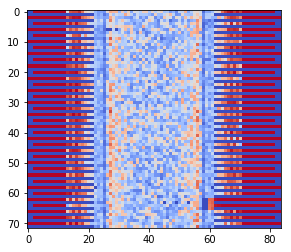

In [6]:
data_folder = '../data/'
file_name = 'HCAL_digi+rechit_occ.hdf5'
group = 'RecHitTask_Occupancy_depth_depth1'

input_file=h5py.File(data_folder+"/"+file_name,'r')

data1 = np.array(input_file)
data_size1=data.shape

data_sample1 = np.array(input_file[group])
data_samplesize1=data_sample.shape



print data_sample1
print group
'''[u'DigiTask_Occupancy_depth_depth1' u'DigiTask_Occupancy_depth_depth2'
 u'DigiTask_Occupancy_depth_depth3' u'DigiTask_Occupancy_depth_depth4'
 u'DigiTask_Occupancy_depth_depth5' u'DigiTask_Occupancy_depth_depth6'
 u'DigiTask_Occupancy_depth_depth7' u'RecHitTask_Occupancy_depth_depth1'
 u'RecHitTask_Occupancy_depth_depth2' u'RecHitTask_Occupancy_depth_depth3'
 u'RecHitTask_Occupancy_depth_depth4' u'RecHitTask_Occupancy_depth_depth5'
 u'RecHitTask_Occupancy_depth_depth6' u'RecHitTask_Occupancy_depth_depth7']
 '''
print data_samplesize1
print data1


input_image1=data_sample1[1]

print "Shape of image is: ",input_image1.shape
print 'input image is \n '
print input_image1

im=plt.imshow(input_image1,cmap=cm.coolwarm)

plt.show()
plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
         #as opposed to plt.close which closes the window. If you are showing many images at a time without
         #closing the window it is better.
        
        
#input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))

# I want to see if my kill region function and my hot region function work

In [7]:
def killregion(image,xdim,ydim):  
    tempX=image.copy()
    x1=xdim[0]
    x2=xdim[1]
    y1=ydim[0]
    y2=ydim[1]
    if tempX.ndim ==3:
        
        for k in range(tempX.shape[0]):
            
            for i in range(x1,x2):
                
                for j in range(y1,y2):
                    
                    tempX[k,j,i]=0
    
    else:
        
        for i in range(x1,x2):
            
            for j in range(y1,y2):
                
                tempX[j,i]=0
                
    return tempX


#help (np.zeros)
def hotregion(image,xdim,ydim):  
    tempX=image.copy()
    x1=xdim[0]
    x2=xdim[1]
    y1=ydim[0]
    y2=ydim[1]
    if tempX.ndim ==3:
        
        for k in range(tempX.shape[0]):
            
            for i in range(x1,x2):
                
                for j in range(y1,y2):
                    
                    tempX[k,j,i]=np.max(image)
    else:
        
        for i in range(x1,x2):
            
            for j in range(y1,y2):
                
                tempX[j,i]=np.max(image)
                
    return tempX

Let's randomize this so that the region being killed is random

In [10]:
def create_random_noise_region_in_image(image,xdim,ydim):
    
    
    tempX=image.copy()
    x1=xdim[0]
    x2=xdim[1]
    y1=ydim[0]
    y2=ydim[1]
    rand_noise_image=np.random.randint(np.max(data_sample1), size=( abs(x2-x1), abs(y2-y1) ) )   
   
    if tempX.ndim == 3:
        
        for k in range(tempX.shape[0]):
            
            for i in range(x1,x2):
                
                for j in range(y1,y2):
                    te = i-x1
                    te2= j-y1
                    tempX[k,j,i]=rand_noise_image[te2,te]
    
    else:
        
        for i in range(x1,x2):
            
            for j in range(y1,y2):
                te = i-x1
                te2= j-y1
                tempX[j,i]=rand_noise_image[te2,te]
                
    return tempX

# Plotting my bad data image

Shape of image is:  (72, 84)


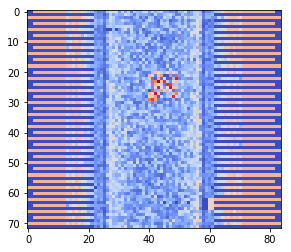

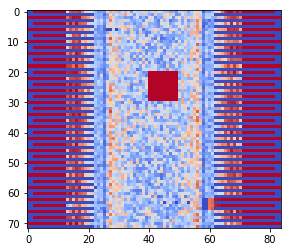

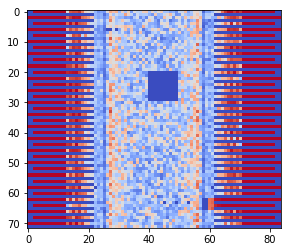

In [11]:
input_image1=data_sample1[0]
xdim=(40,50)
ydim=(20,30)

deadregion_image=killregion(input_image1,xdim,ydim)

hotregion_image= hotregion(input_image1,xdim,ydim)

random_noise_region= create_random_noise_region_in_image(input_image1,xdim,ydim)

print "Shape of image is: " ,random_noise_region.shape
#print 'input image is \n '
#print deadregion_image
im=plt.imshow(random_noise_region,cmap=cm.coolwarm)
plt.show()
plt.clf()

im=plt.imshow(hotregion_image,cmap=cm.coolwarm)
plt.show()
plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
         #as opposed to plt.close which closes the window. If you are showing many images at a time without
         #closing the window it is better.
im=plt.imshow(deadregion_image,cmap=cm.coolwarm)
plt.show()
plt.clf()
#input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))


# I would like to create about 100 bad data images

(100, 72, 84)
Shape of dead image is:  (100, 72, 84)
Shape of hot image is:  (100, 72, 84)
Shape of random image is:  (100, 72, 84)

max of image is:  2020.0


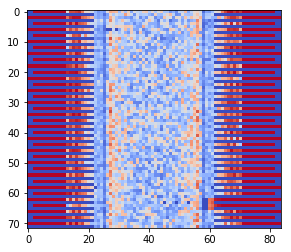

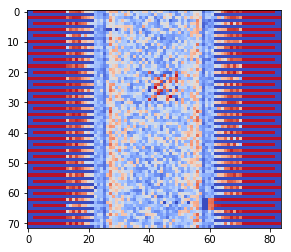

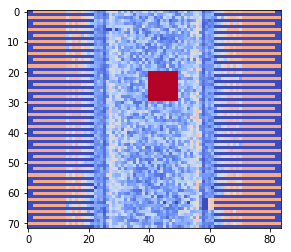

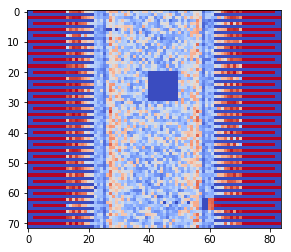

In [12]:
input_image1=data_sample1[:100]
print input_image1.shape
xdim=(40,50)
ydim=(20,30)
hotregion_image= hotregion(input_image1,xdim,ydim)
deadregion_image=killregion(input_image1,xdim,ydim)
random_noise_region= create_random_noise_region_in_image(input_image1,xdim,ydim)


print "Shape of dead image is: " ,deadregion_image.shape
print "Shape of hot image is: " ,hotregion_image.shape
print "Shape of random image is: " ,random_noise_region.shape

print '\nmax of image is: ' ,np.max(input_image1)

im=plt.imshow(input_image1[4],cmap=cm.coolwarm)
plt.show()
plt.clf()


im=plt.imshow(random_noise_region[10],cmap=cm.coolwarm)
plt.show()
plt.clf()

im=plt.imshow(hotregion_image[4],cmap=cm.coolwarm)
plt.show()
plt.clf()#plt.clf clears the figure and it's axis but leaves the window open. 
         #as opposed to plt.close which closes the window. If you are showing many images at a time without
         #closing the window it is better.

im=plt.imshow(deadregion_image[1],cmap=cm.coolwarm)
plt.show()
plt.clf()
#input_image=np.reshape(input_image,(input_image.shape[0],input_image.shape[1]))


# Let's start using keras and create a model

# With keras

# Trying out SKlearn 

Adding the bad data images to the sample

In [17]:
data_sample.shape


(999, 72, 84)

In [18]:
data_sample=np.append(data_sample,(deadregion_image),axis=0)
print data_sample.shape

data_sample=np.append(data_sample,(hotregion_image),axis=0)
print data_sample.shape

data_sample=np.append(data_sample,(hotregion_image),axis=0)
print data_sample.shape


(1099, 72, 84)
(1199, 72, 84)
(1299, 72, 84)


Insert a column in every image of 1's or True ( this will represent it's label)

In [19]:
sample=np.reshape(data_sample,(data_sample.shape[0],data_sample.shape[1]*data_sample.shape[2]))
sample.shape


(1299, 6048)

In [20]:
#help(np.append)
sample=np.append(sample,np.ones((sample.shape[0],1)),axis=1 )
sample.shape

(1299, 6049)

In [21]:
sample[999:,-1:]=0
print sample[-5:,-1:]

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [22]:
sample[999:,-1:].shape

(300, 1)

Let's define our Data and Lables

In [23]:
X=sample[:,:-1]
y=sample[:,-1]
print X.shape,'\n',y.shape

(1299, 6048) 
(1299,)


In [63]:
#from sklearn.neural_network import MLPClassifier #this one takes too long
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split,cross_val_score
Xtrain,Xtest,ytrain, ytest=train_test_split(X,y,test_size=0.4 )

print Xtrain.shape
print Xtest.shape
print ytrain.shape
print ytest.shape

(779, 6048)
(520, 6048)
(779,)
(520,)


In [64]:
logreg=LogisticRegression()
scores= cross_val_score(logreg,X,y,cv=10,scoring='accuracy')
print scores.mean()

1.0


In [65]:
logreg.fit(Xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Evaluating the model 

In [66]:
pred=logreg.predict(Xtest)
print pred.shape
print metrics.accuracy_score(ytest,pred)

(520,)
1.0


In [67]:
#calcualte null accuracy
max(ytest.mean(),1-ytest.mean())

0.75576923076923075

In [68]:
#Confusion matrix
print metrics.confusion_matrix(ytest,pred)

[[127   0]
 [  0 393]]


In [30]:
print'True', ytest[0:15]
print 'Pred', pred[0:15]

True [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.]
Pred [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.]


In [31]:
#save confusion matrix and slice into 4 pieces
confusion= metrics.confusion_matrix(ytest,pred)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [32]:
print TP
print TN
print FP
print FN

399
121
0
0


In [33]:
#Clasification Accuracy
#how often is the Clf correct?
print (TP+TN)/ float(TP+TN+FP+FN)
print metrics.accuracy_score(ytest,pred)

1.0
1.0


In [34]:
#Clasification Error
# how often is it incorrect?
print (FP+FN)/ float(TP+TN+FP+FN)
print 1- metrics.accuracy_score(ytest,pred)

0.0
0.0


In [35]:
#Sensitivity
# How often if the prediction correct when the actual value is pos. 
#AKA True pos or Recall

print TP/ float(TP+FN)
print metrics.recall_score(ytest,pred)

1.0
1.0


In [36]:
#Specificity 
# When the actual result is neg how often is it correct?
print TN/ float(TN+FP)

1.0


In [37]:
#false positive
# When the actual value is negative how often is it incorrect
print FP/ float(TN+FP)

0.0


In [38]:
#Precision
#When a positive value is predicted, how often is it correct?
print TP/ float(TP +FP)
print metrics.precision_score(ytest,pred)

1.0
1.0


# Adjusting the clasification threshold

In [39]:
#print the first 10 predicted responses
logreg.predict(Xtest)[0:10]

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [40]:
#print the first 10 predicted probabilities of class membership
logreg.predict_proba(Xtest)[0:10,:]

array([[  9.99999988e-01,   1.21690404e-08],
       [  2.83753243e-10,   1.00000000e+00],
       [  3.72490927e-11,   1.00000000e+00],
       [  7.40619123e-08,   9.99999926e-01],
       [  1.09592335e-11,   1.00000000e+00],
       [  2.57552881e-08,   9.99999974e-01],
       [  4.11628731e-10,   1.00000000e+00],
       [  6.32869313e-11,   1.00000000e+00],
       [  1.56123781e-10,   1.00000000e+00],
       [  1.94386624e-07,   9.99999806e-01]])

In [41]:
#print the first 10 predicted probabilities for class 1
logreg.predict_proba(Xtest)[0:10,1]

array([  1.21690404e-08,   1.00000000e+00,   1.00000000e+00,
         9.99999926e-01,   1.00000000e+00,   9.99999974e-01,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         9.99999806e-01])

In [42]:
#store the predicted probabilities for class 1
y_pred_prob=logreg.predict_proba(Xtest)[:,1]

In [43]:
#allow plots to appear in the notebook
%matplotlib inline
plt.rcParams['font.size']=14

Text(0,0.5,u'Frequency')

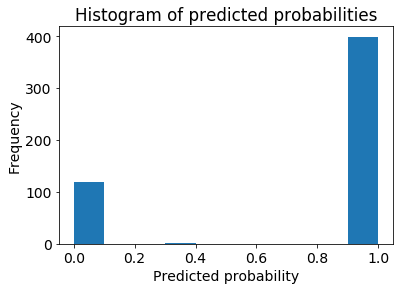

In [44]:
#histogram of predicted probabilities
plt.hist(y_pred_prob)#bins=8)
#plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

# Decrease the threshold 

In [45]:
#predict good if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
pred= binarize(y_pred_prob,0.3)[0]

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [46]:
#print the first 10 predicted probabilities
y_pred_prob[0:10]

array([  1.21690404e-08,   1.00000000e+00,   1.00000000e+00,
         9.99999926e-01,   1.00000000e+00,   9.99999974e-01,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         9.99999806e-01])

In [47]:
#print the first 10 predicted classes with new thershold
pred[0:10]

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [48]:
#print old confusion matrix
print confusion

[[121   0]
 [  0 399]]


In [49]:
#print new confusion matrix
print metrics.confusion_matrix(ytest,pred)

[[120   1]
 [  0 399]]


# ROC Curves and Area Under the Curve (AUC)

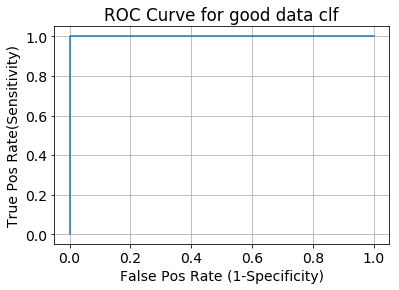

In [50]:
fpr,tpr,thresholds= metrics.roc_curve(ytest,y_pred_prob)
plt.plot(fpr,tpr)
#plt.xlim([0.0,1.0])
#plt.ylim([0.0,1.0])
plt.title('ROC Curve for good data clf')
plt.xlabel('False Pos Rate (1-Specificity)')
plt.ylabel('True Pos Rate(Sensitivity)')
plt.grid(True)

In [51]:
#define a function that accepts a threshold and prints sensitivity and specificity
def evalualte_threshold(threshold):
    print 'Sensitivity:',tpr[thresholds > threshold][-1]
    print 'Specificity:',1- fpr[thresholds > threshold][-1]

In [52]:
evalualte_threshold(.3)

Sensitivity: 1.0
Specificity: 1.0


# AUC is the percentage of the ROC plot that is under the curve

In [53]:
print metrics.roc_auc_score(ytest,y_pred_prob)

1.0


This is useful as a single number summary of classifier performance

In [54]:
# Calculate cross validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg,X,y,cv=10,scoring='roc_auc').mean()

1.0